In [ ]:
# import gym
# env = gym.make('HalfCheetah-v2')
# env.reset()
# for _ in range(1000):
#     env.render()
#     a = env.action_space.sample()
#     o, r, done, info = env.step(a)
#     if done:
#         o = env.reset()
# env.close()

In [1]:
import gym
from tqdm import tqdm
env_name = 'HalfCheetah-v2'


env = gym.make(env_name)

traj = []
for trial in tqdm(range(6000)):
    o = env.reset()
    epis = []
    for _ in range(200):
        # env.render()
        a = env.action_space.sample()
        o, r, done, info = env.step(a)
        epis.append([a, o])
    traj.append(epis)
env.close()

100%|██████████| 6000/6000 [04:09<00:00, 24.04it/s]


In [2]:
import joblib
import numpy as np

traj_train, traj_test = traj[:5000], traj[5000:]

traj_train_a = np.array([[step[0] for step in epis] for epis in traj_train], dtype=np.float32)
traj_train_o = np.array([[step[1] for step in epis] for epis in traj_train], dtype=np.float32)
traj_test_a = np.array([[step[0] for step in epis] for epis in traj_test], dtype=np.float32)
traj_test_o = np.array([[step[1] for step in epis] for epis in traj_test], dtype=np.float32)

joblib.dump([traj_train_a, traj_train_o], "./traj_train.pkl")
joblib.dump([traj_test_a, traj_test_o], "./traj_test.pkl")

joblib.dump([
    traj_train_a[:1000].mean(axis=(0,1)),
    traj_train_a[:1000].std(axis=(0,1)),
    traj_train_o[:1000].mean(axis=(0,1)),
    traj_train_o[:1000].std(axis=(0,1)),
], "./param.pkl")

print(traj_train_a.shape, traj_train_o.shape, traj_test_a.shape, traj_test_o.shape)

(5000, 200, 6) (5000, 200, 17) (1000, 200, 6) (1000, 200, 17)


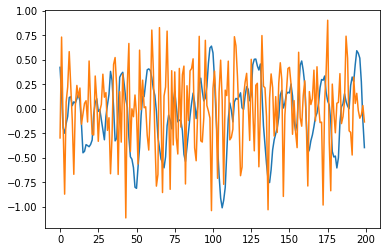

In [3]:
import matplotlib.pyplot as plt

plt.plot(traj_train_o[0,:,0] / 0.2 + 0.5)
plt.plot(traj_train_o[0,:,-1] / 15)
plt.show()